This notebook walks through some of the functionality of ebms_mcm code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ebms_mcmc.gen_data.generate_toy_data import gen_toy_data
from ebms_mcmc.mcmc.mcmc import MCMC
from ebms_mcmc.evidence_calc.polynomials import Polynomials 
from ebms_mcmc.eval.plotting import Plotting
from ebms_mcmc import default_params

First, we generate toy data given a true model: $y = -0.3-0.5x+0.9x^3$  
The parameters are then a np.array with length 3 and the binary specification is [1,1,0,0].  
We need to add a noise scale, the width of Gaussian, and how many points we want.

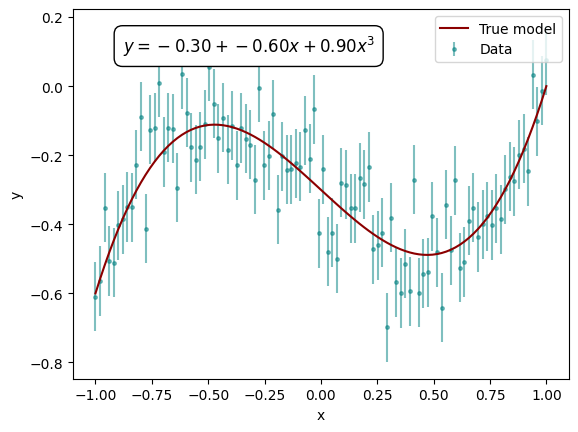

In [6]:
poly_params = np.array([-0.3, -0.6, 0.9 ])
binary_model = [1, 1, 0, 1]
noise_scale = 0.1
num_points = 100
# override default params
gen_settings = {**default_params['data']['params'],
                **{'params': poly_params, 'bin': binary_model}}

# simualate data
data, _, _ = gen_toy_data(num_points=num_points,
                          noise_scale=noise_scale,
                          params=gen_settings,
                          name='data/',
                          plot=True)

The data is saved as a .npz file with the keys `x_data`, `y_data`, `y_err`, `params` and `bin`.  
If external data is used for the model selection, the necessary keys are: 
- `x_data`  
- `y_data`
- `y_err` or `cov`

With this data we can infer the model posterior. We need to give at least where the data is stored and give a function to calculate the evidence.

In [ ]:
mcmc_params = {**default_params['run'],**{'data_path' : 'data/toy_data.npz'}}
log_evidence_func = Polynomials(mcmc_params).log_evidence
mcmc_class = MCMC(mcmc_params)

{'name': 'run/', 'data_type': 'toy_data', 'data_path': 'data/toy_data.npz', 'resume_evidence_file': None, 'max_poly_degree': 7, 'n_iterations': 100000, 'prior_kind': 'normalisable', 'prop_dist': 'poisson', 'param_prior': 'gaussian', 'param_prior_range': [-10, 10], 'prior_gaussian_mean': 0, 'prior_gaussian_inv_cov': 1, 'multinest_params': {'evidence_tolerance': 0.5, 'n_live_points': 400}}
